<a href="https://colab.research.google.com/github/pragyan8804/Cars_Analysis/blob/main/ms_engage_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('cars_engage_2022.csv')

In [8]:
df

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


# Cleaning


In [9]:
df.isnull().sum()

Unnamed: 0              0
Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 141, dtype: int64

In [10]:
df["Make"] = df["Make"].fillna("Unknown")

df["Make"]

0             Tata
1             Tata
2             Tata
3             Tata
4             Tata
           ...    
1271         Honda
1272         Honda
1273         Honda
1274         Honda
1275    Mitsubishi
Name: Make, Length: 1276, dtype: object

In [11]:
df["Displacement"] = df["Displacement"].apply(str).str.replace("cc", "")
df["Displacement"] = pd.to_numeric(df["Displacement"],errors='coerce')
df["Displacement"] = df["Displacement"].fillna(df["Displacement"].mean())

df["Displacement"]

0        624.0
1        624.0
2        624.0
3        624.0
4        624.0
         ...  
1271    1498.0
1272    1498.0
1273    1497.0
1274    1497.0
1275    3200.0
Name: Displacement, Length: 1276, dtype: float64

In [12]:
df["Cylinders"] = df["Cylinders"].fillna(df["Cylinders"].mode())

df["Cylinders"]

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
1271    4.0
1272    4.0
1273    4.0
1274    4.0
1275    4.0
Name: Cylinders, Length: 1276, dtype: float64

In [13]:
df["Valves_Per_Cylinder"] = df["Valves_Per_Cylinder"].fillna(df["Valves_Per_Cylinder"].mode())

df["Valves_Per_Cylinder"]

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
1271    4.0
1272    4.0
1273    4.0
1274    4.0
1275    4.0
Name: Valves_Per_Cylinder, Length: 1276, dtype: float64

In [15]:
df["Highway_Mileage"]=df["Highway_Mileage"].str.replace("?","")
df["Highway_Mileage"]=df["Highway_Mileage"].str.replace(",",".")
df["Highway_Mileage"]=df["Highway_Mileage"].str.rstrip("km/litre")
df["Highway_Mileage"]=pd.to_numeric(df["Highway_Mileage"],errors='coerce')
df["Highway_Mileage"].fillna(df["Highway_Mileage"].mean(),inplace=True)

df["Highway_Mileage"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0       16.901326
1       16.901326
2       16.901326
3       16.901326
4       16.901326
          ...    
1271    25.100000
1272    25.100000
1273    18.000000
1274    16.400000
1275    11.560000
Name: Highway_Mileage, Length: 1276, dtype: float64

In [17]:
#cleaned data
df

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


# Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfle=df

dfle.Make=le.fit_transform(dfle.Make)

dfle.Cylinders=le.fit_transform(dfle.Cylinders)

dfle.Valves_Per_Cylinder=le.fit_transform(dfle.Valves_Per_Cylinder)

dfle.City_Mileage=le.fit_transform(dfle.City_Mileage)

dfle.Highway_Mileage=le.fit_transform(dfle.Highway_Mileage)

dfle

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,35,Nano Genx,Xt,"Rs. 2,92,667",624.0,0,1,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,35,Nano Genx,Xe,"Rs. 2,36,447",624.0,0,1,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,35,Nano Genx,Emax Xm,"Rs. 2,96,661",624.0,0,1,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,35,Nano Genx,Xta,"Rs. 3,34,768",624.0,0,1,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,35,Nano Genx,Xm,"Rs. 2,72,223",624.0,0,1,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,12,City,Vx Mt Diesel,"Rs. 13,02,000",1498.0,2,3,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,12,City,Zx Mt Diesel,"Rs. 14,21,000",1498.0,2,3,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,12,City,Zx Cvt Petrol,"Rs. 14,31,000",1497.0,2,3,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,12,City,V Cvt Petrol,"Rs. 12,01,000",1497.0,2,3,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [49]:
dfle_copy = dfle.copy()

In [25]:
Make=dfle["Make"].tolist()

In [28]:
Price=dfle['Ex-Showroom_Price'].tolist()

# Plots

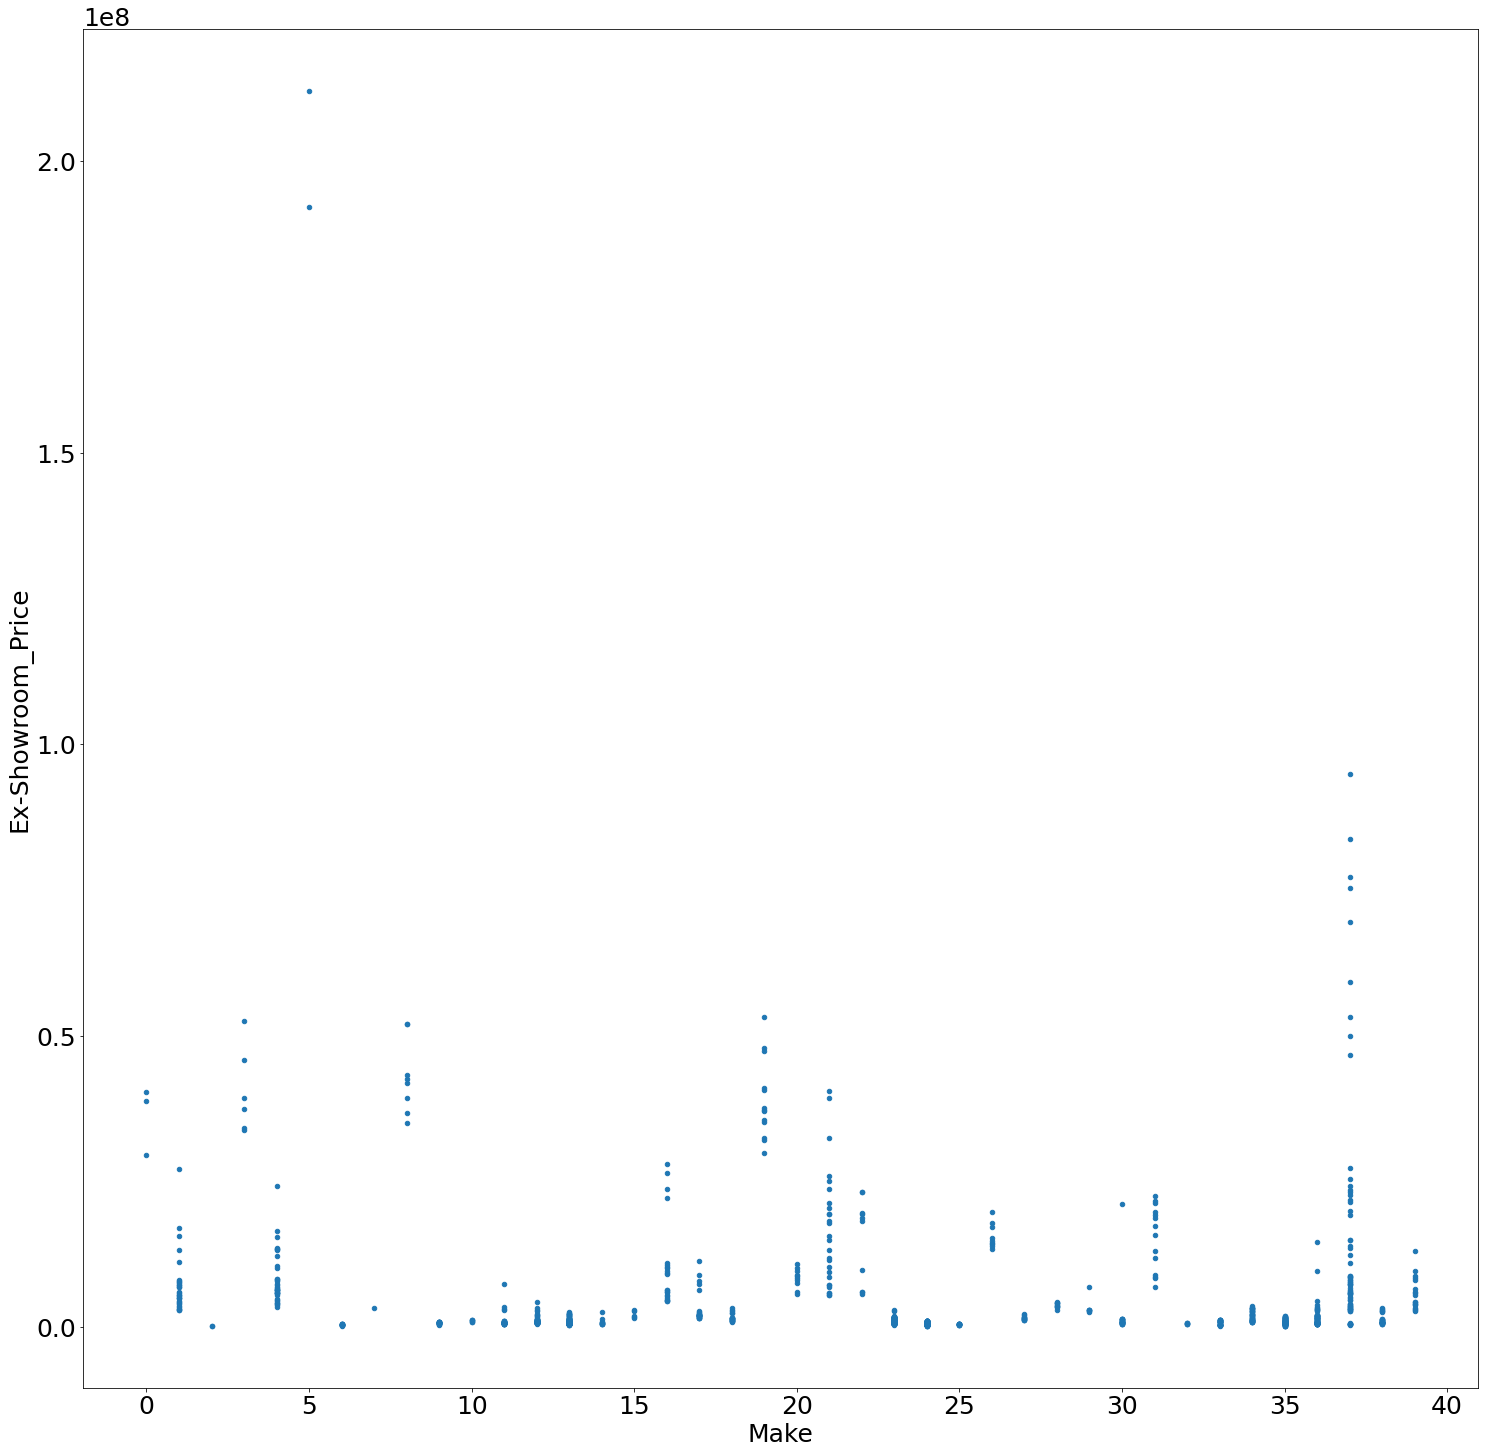

In [27]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size':25})
plt.rcParams["figure.figsize"]=(25,25)
dfle.plot(kind='scatter',x='Make',y='Ex-Showroom_Price')

# Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


x_train,y_train,x_test,y_test=train_test_split(Make,Price,train_size=638)

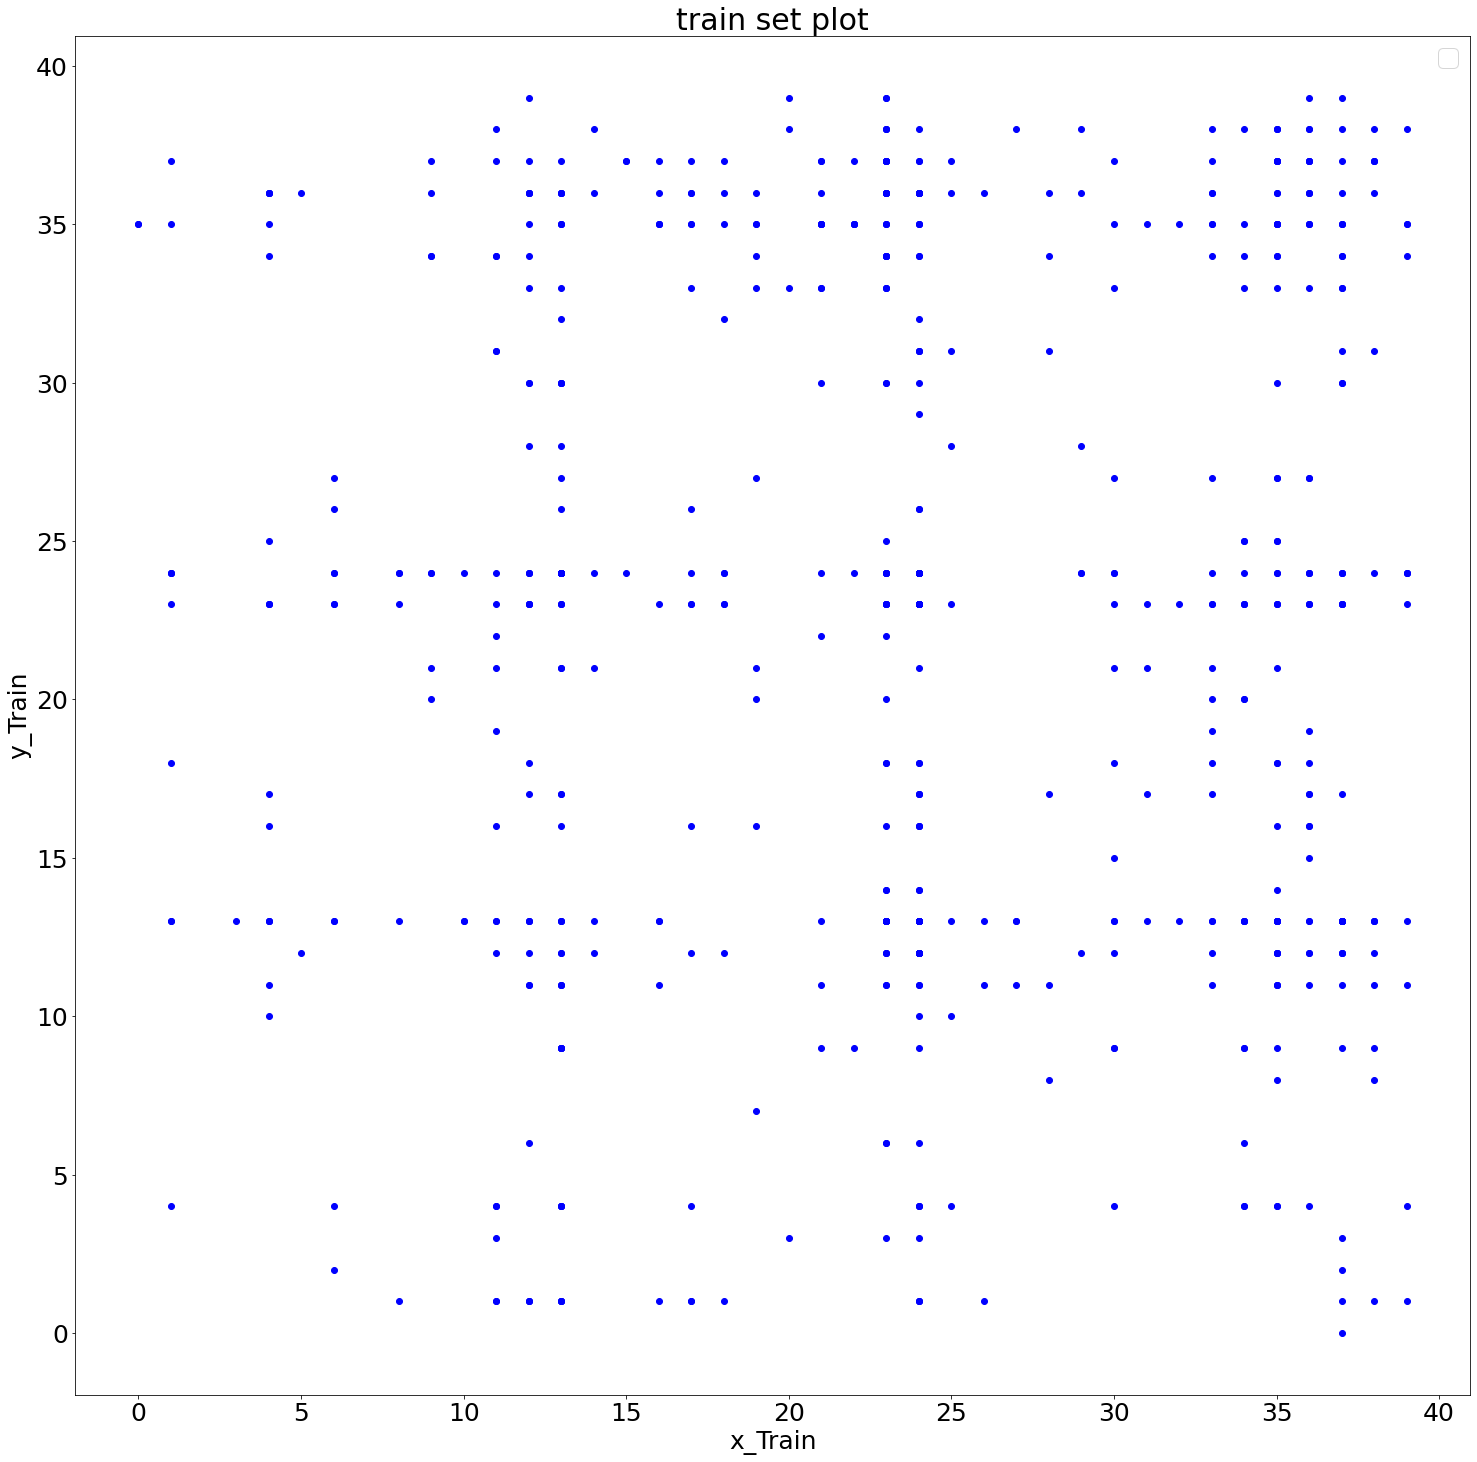

In [30]:
plt.figure(figsize=(25,25))
plt.step(x_train,y_train,'bo')
plt.legend()
plt.title("train set plot")
plt.xlabel('x_Train')
plt.ylabel('y_Train')
plt.show()

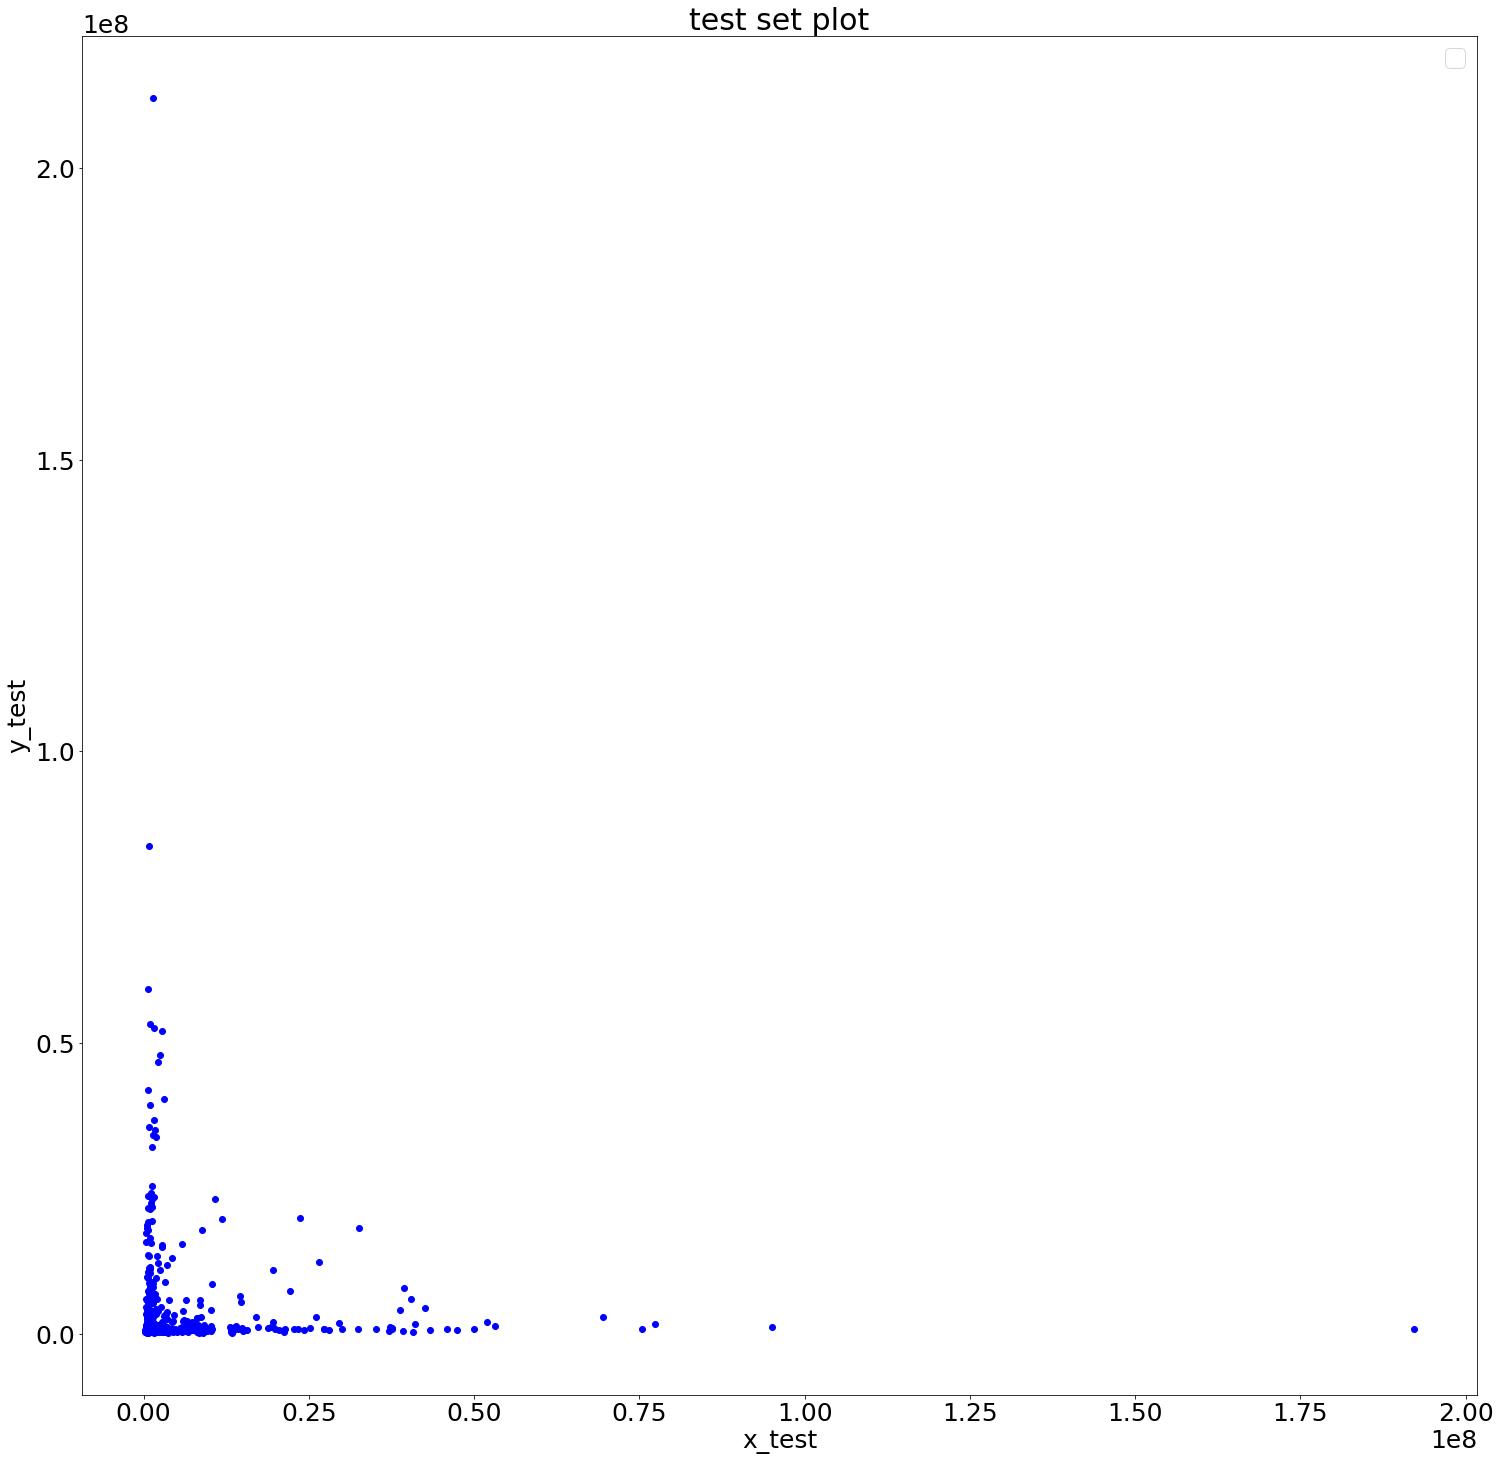

In [37]:
plt.step(x_test, y_test, 'bo')
plt.legend()
plt.title("test set plot")
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.show()

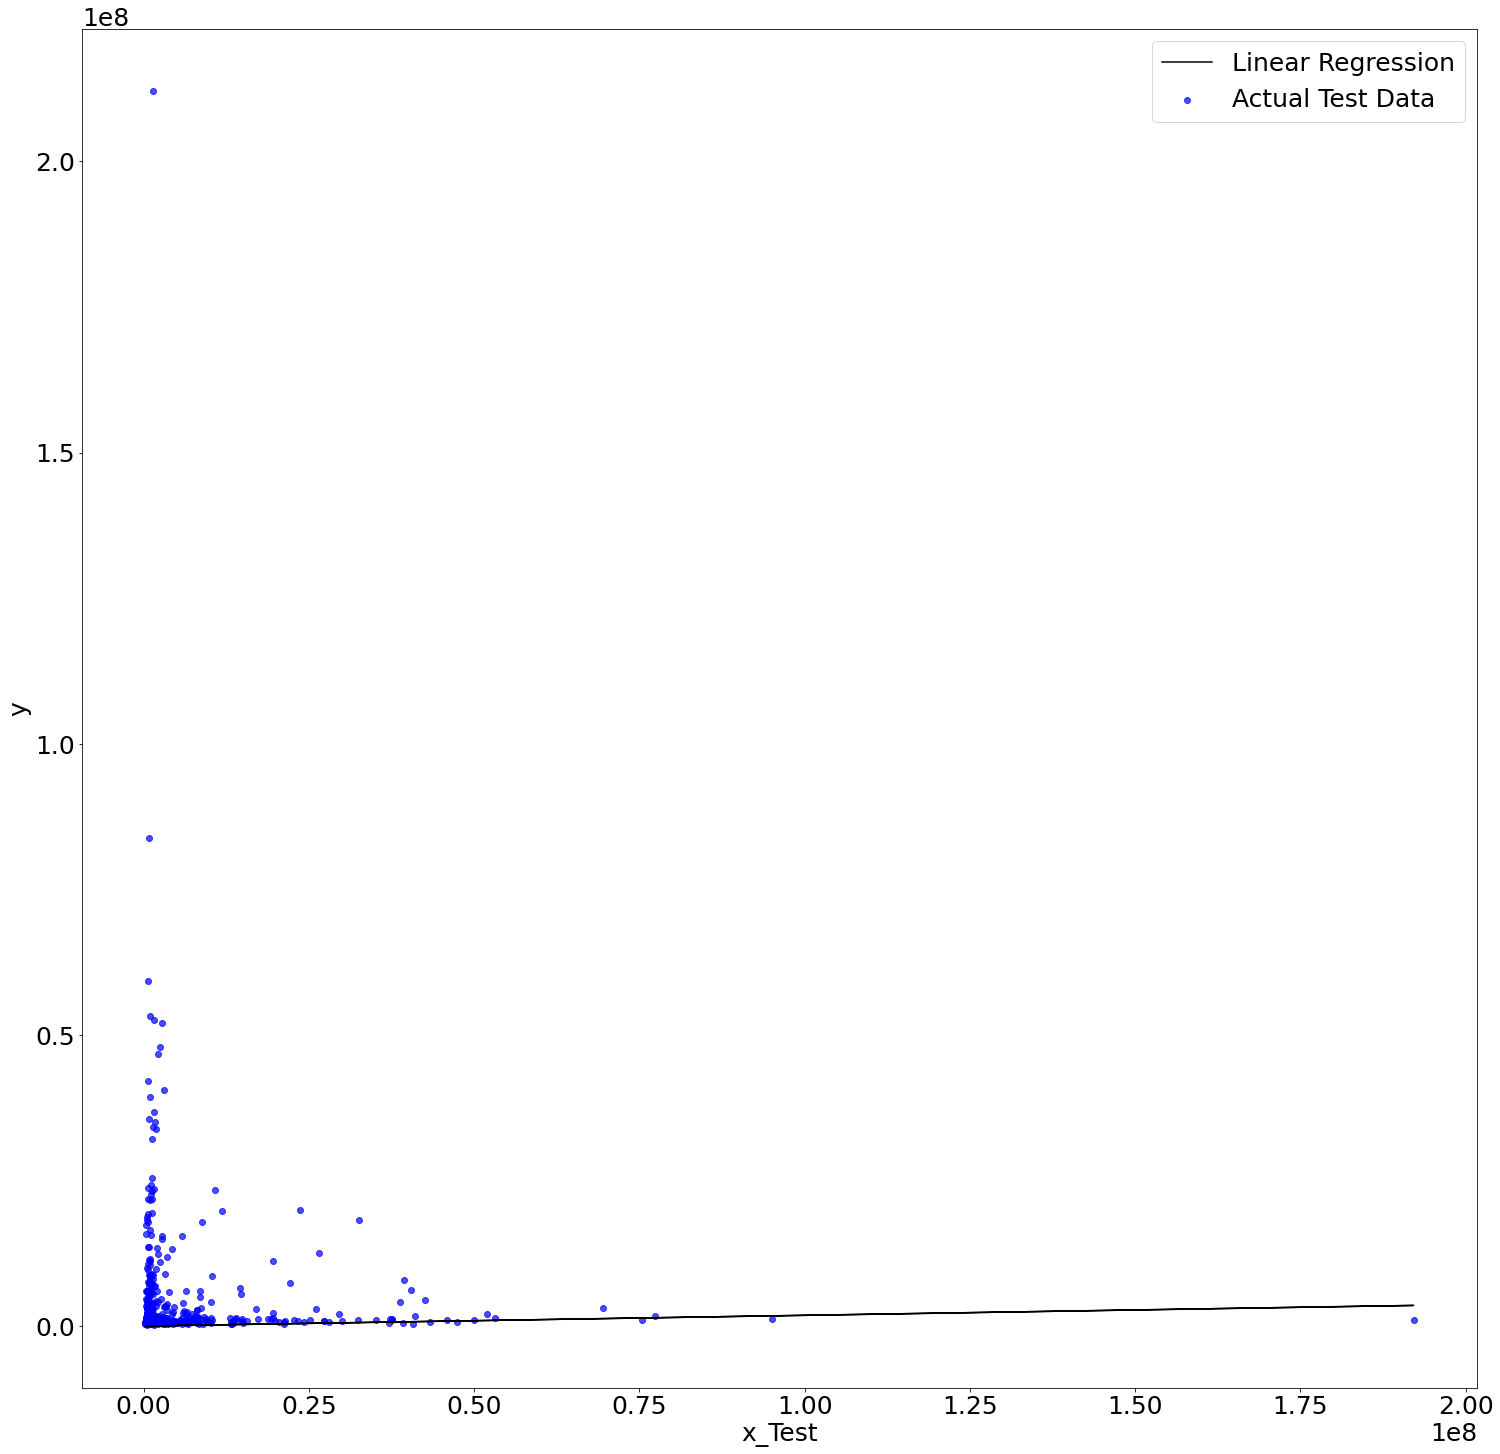

In [38]:
LR=LinearRegression()
X=np.array(x_train)
LR.fit(X.reshape(-1,1),y_train)

X_T=np.array(x_test)
prediction=LR.predict(X_T.reshape(-1,1))
plt.plot(x_test,prediction,label='Linear Regression',color='black')
plt.scatter(x_test,y_test,label='Actual Test Data',color='blue',alpha=0.7)
plt.xlabel('x_Test')
plt.ylabel('y')
plt.legend()
plt.show()

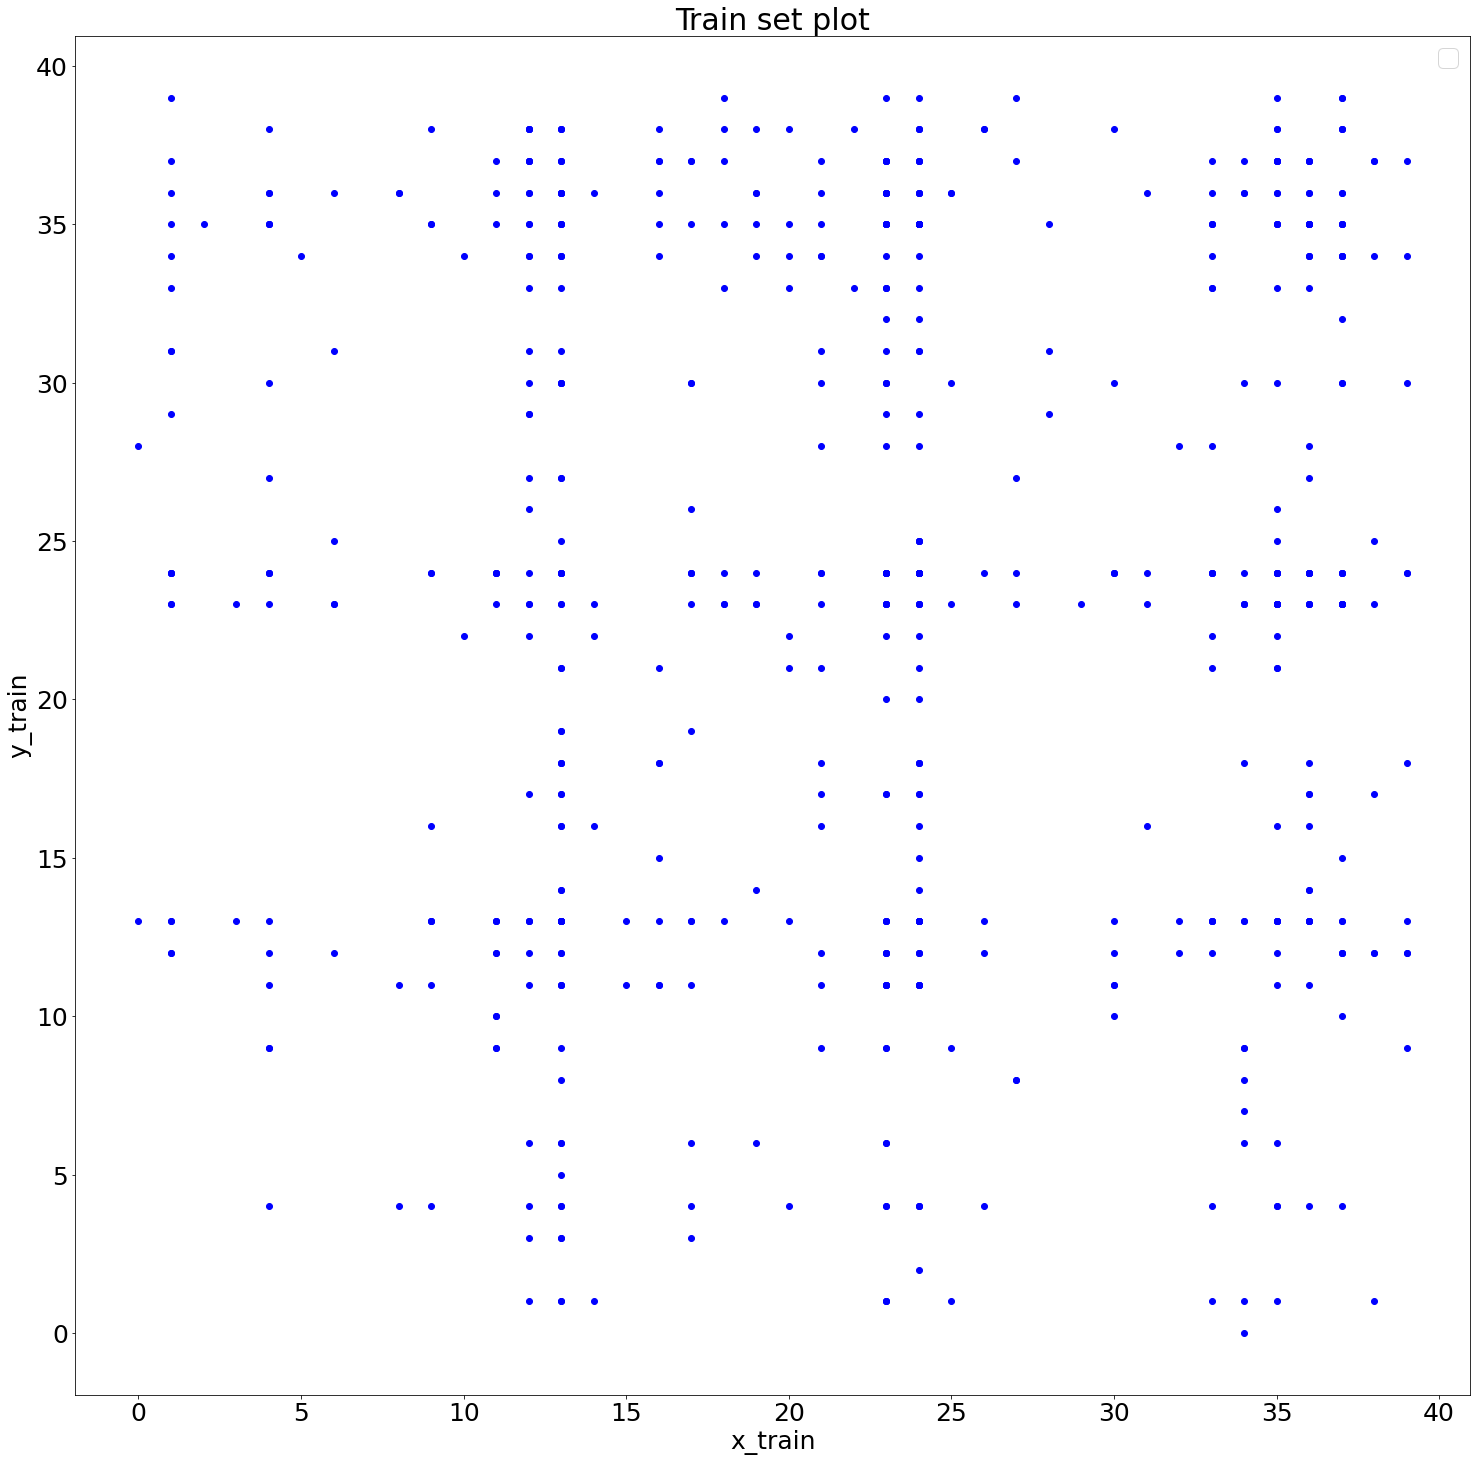

In [42]:
plt.step(x_train,y_train,'bo')
plt.legend()
plt.title("Train set plot")
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.show()

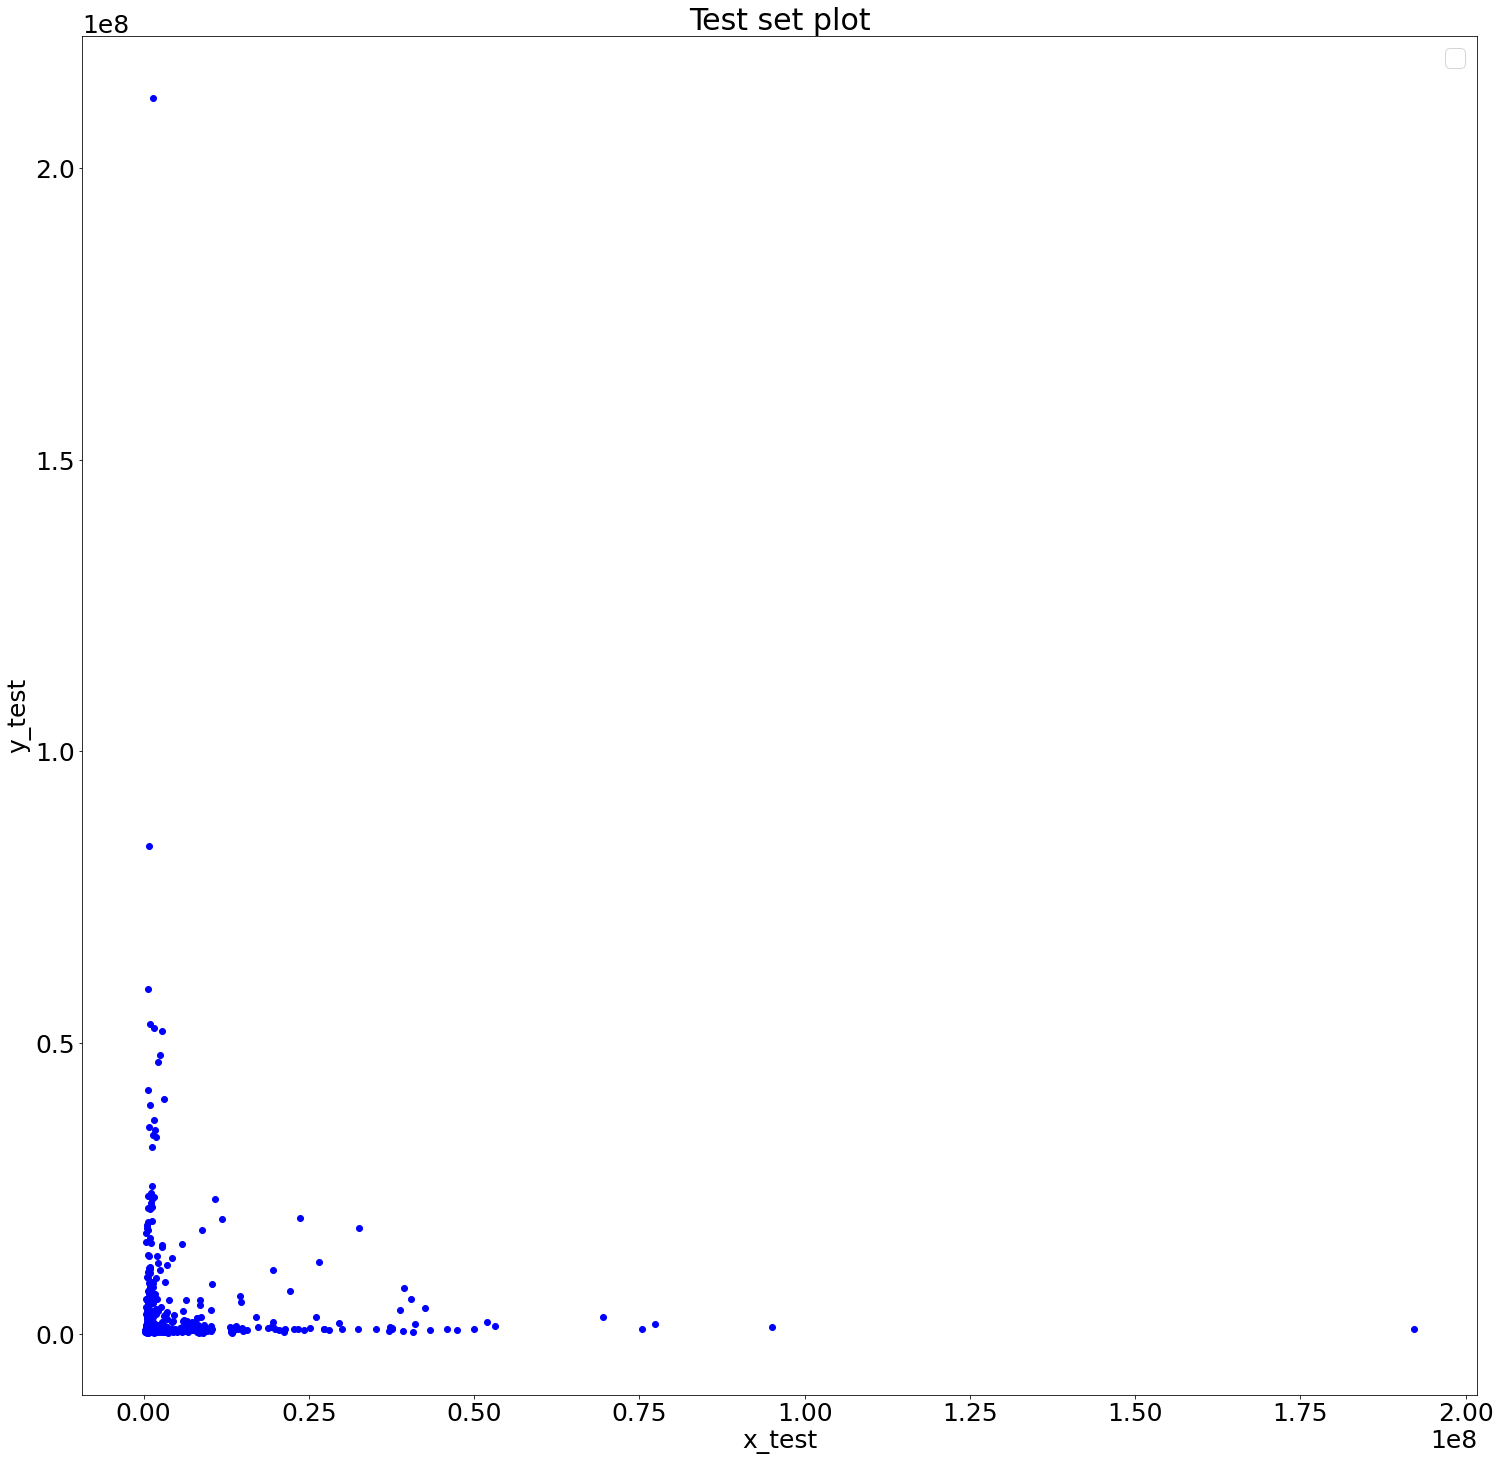

In [43]:
plt.step(x_test,y_test,'bo')
plt.legend()
plt.title("Test set plot")
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.show()

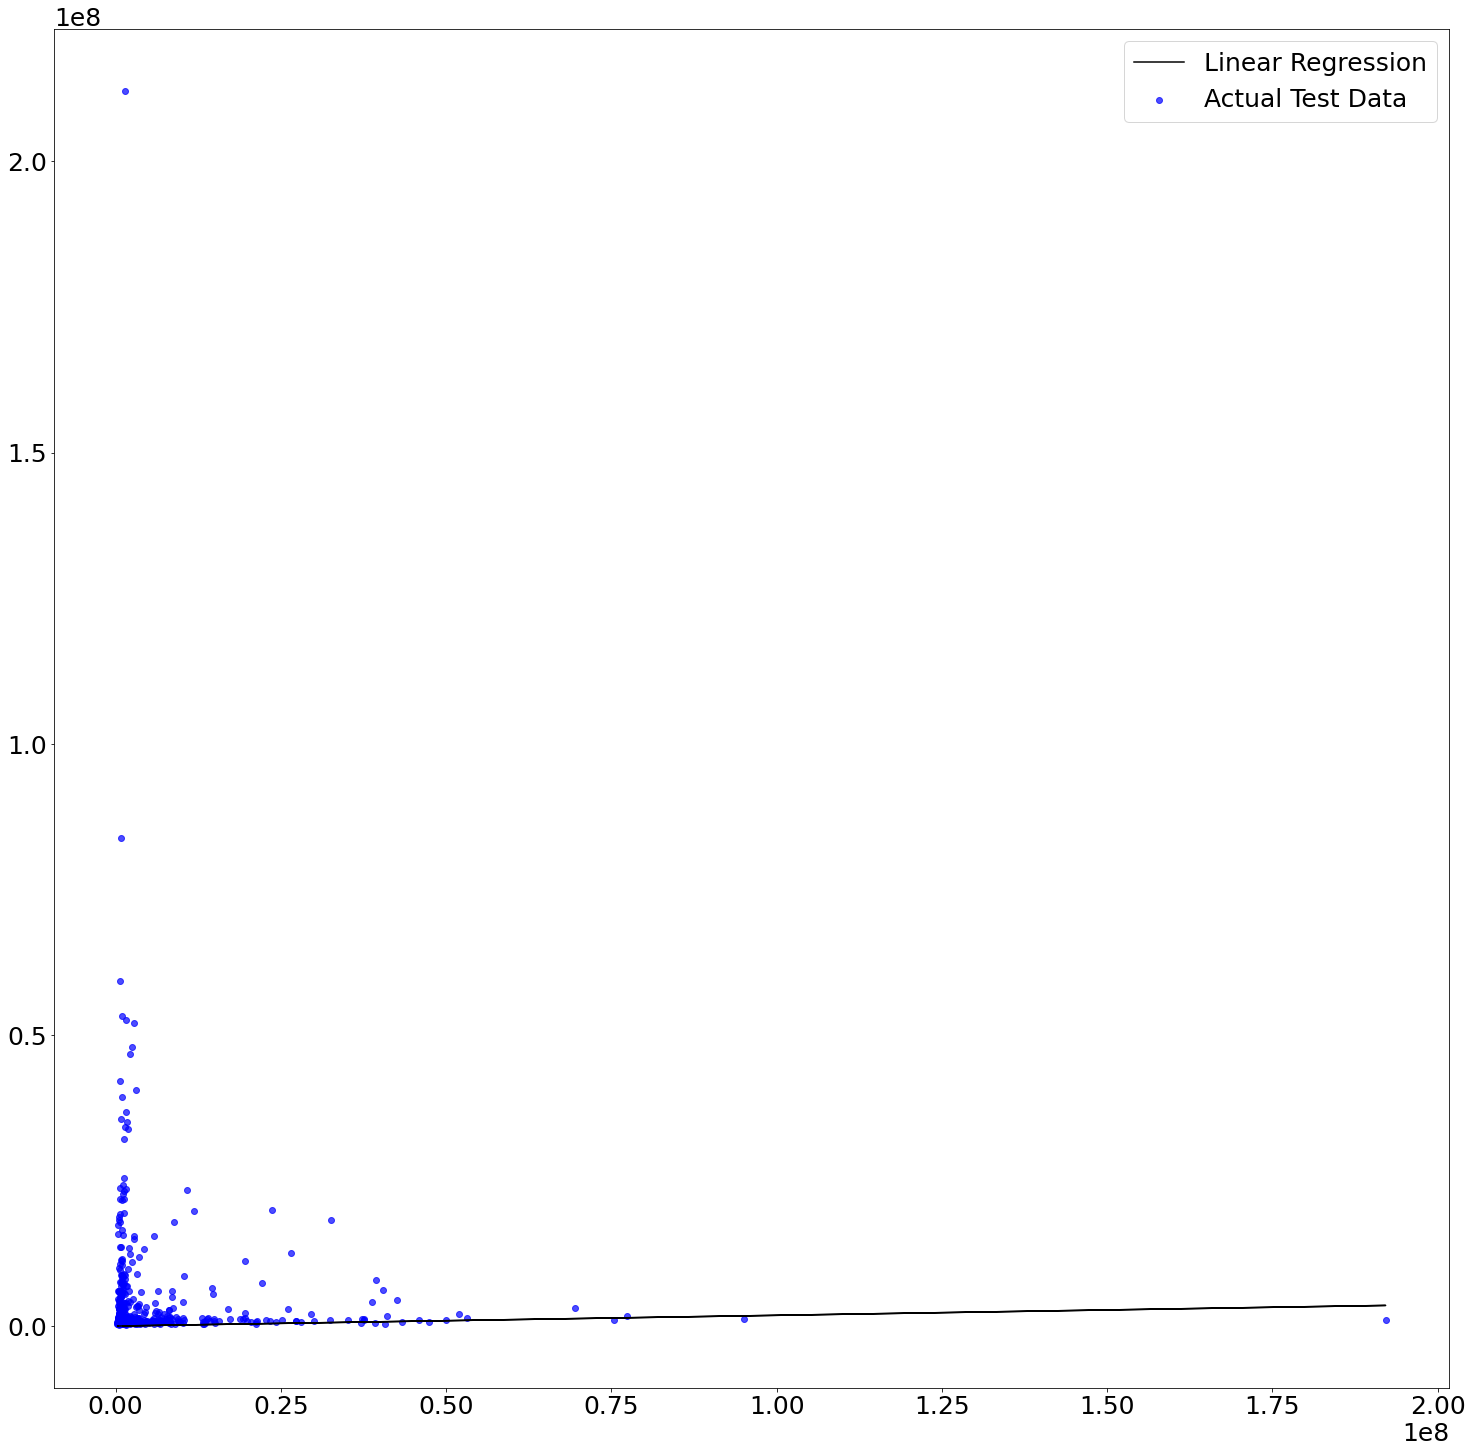

In [44]:
LR2=LinearRegression()
X=np.array(x_train)
LR2.fit(X.reshape(-1,1),y_train)

X_T=np.array(x_test)
prediction=LR2.predict(X_T.reshape(-1,1))
plt.plot(x_test,prediction,label='Linear Regression',color='black')
plt.scatter(x_test,y_test,label='Actual Test Data',color='blue',alpha=0.7)
plt.legend()
plt.show()

# K-2 Clustering

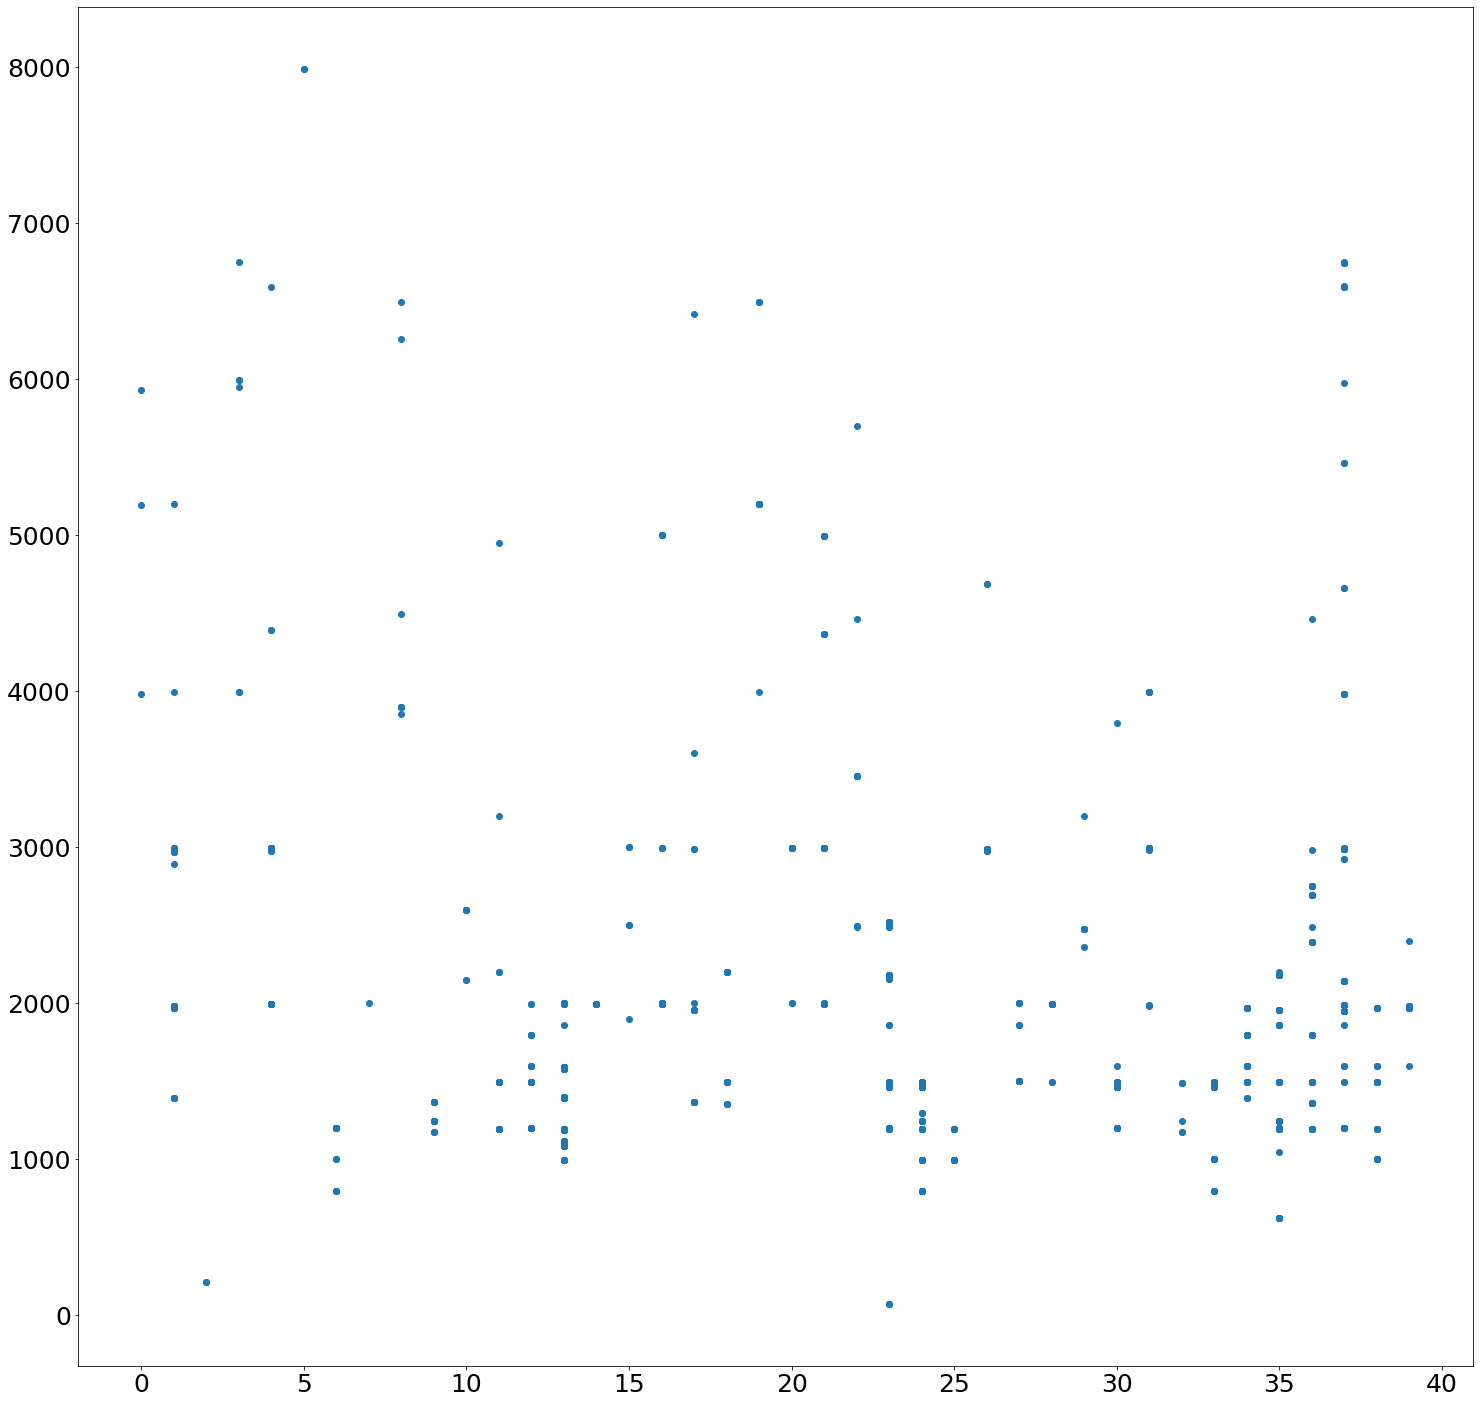

In [45]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

plt.scatter(dfle['Make'],dfle['Displacement'])

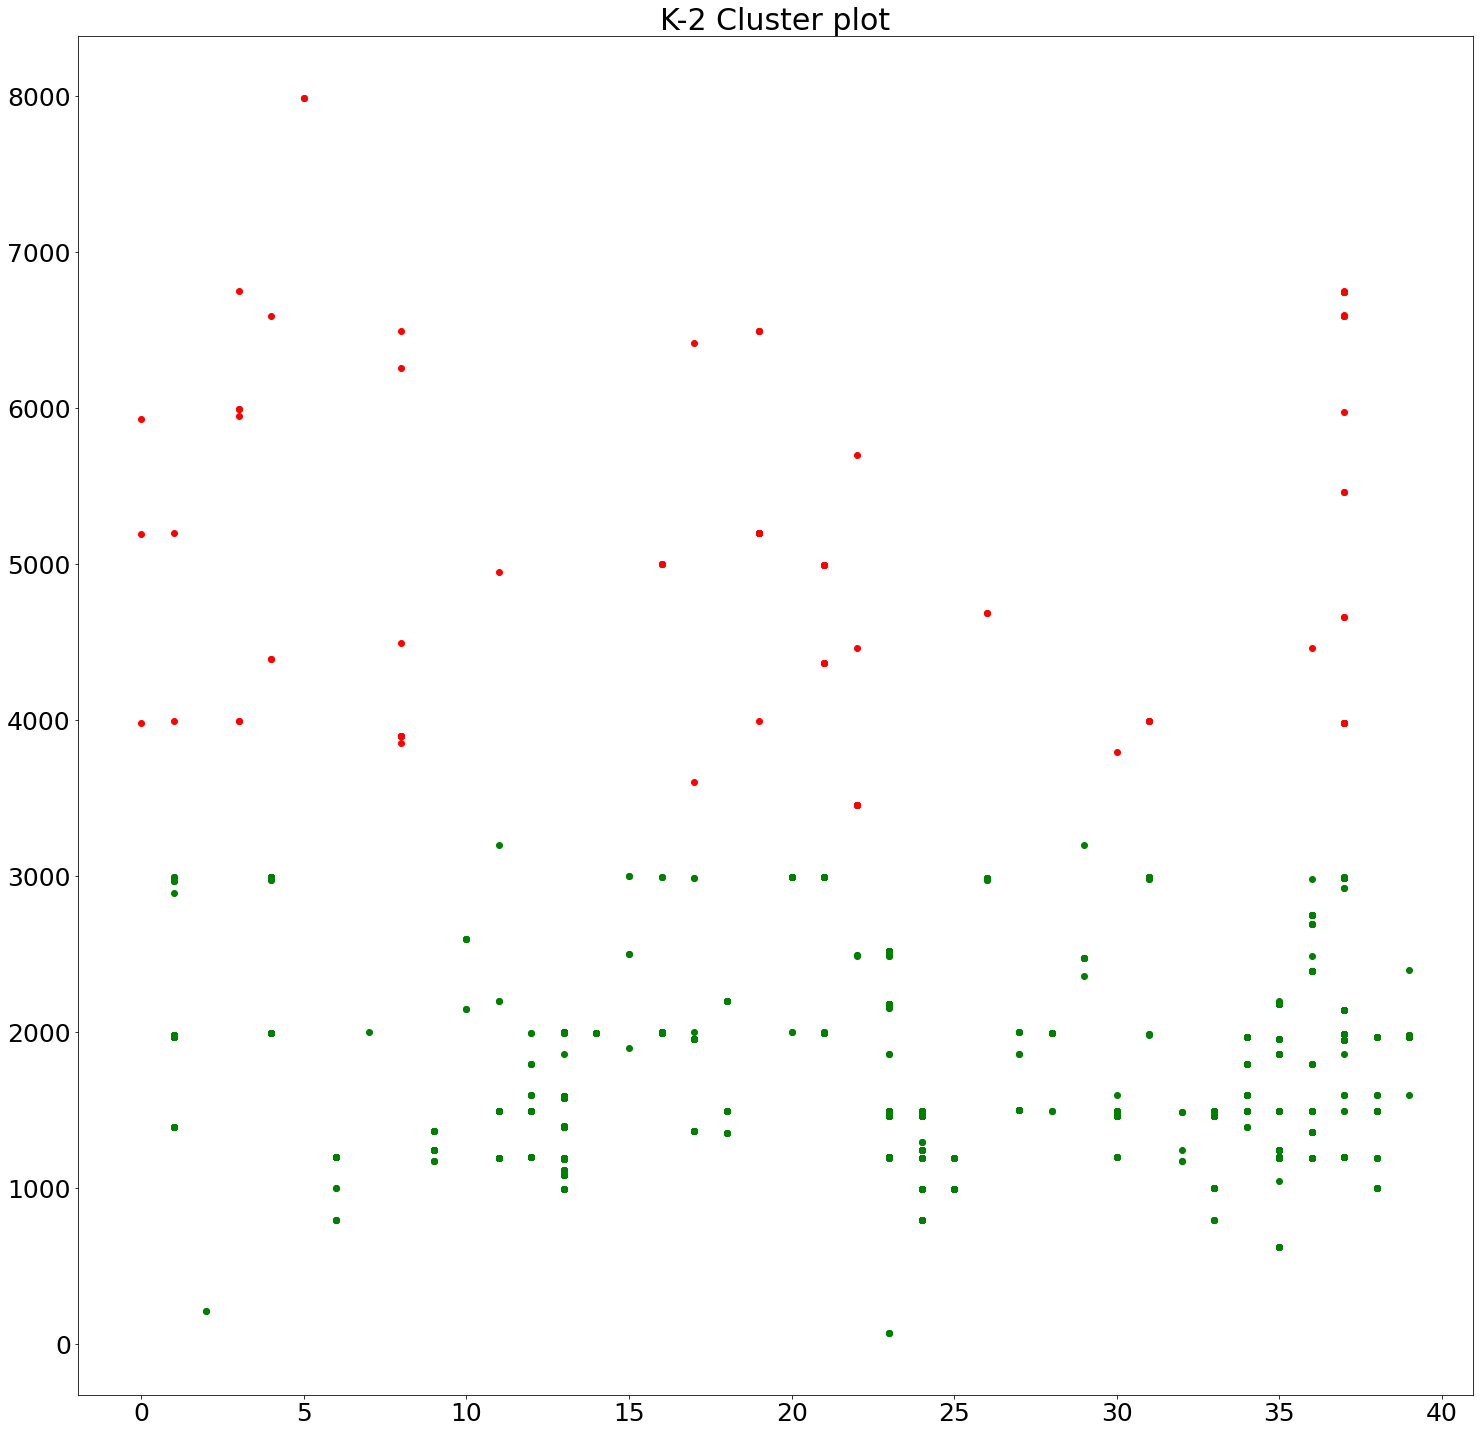

In [47]:
Km = KMeans(n_clusters=2)

y_predicted=Km.fit_predict(dfle[['Make','Displacement']])

dfle['clusters']=y_predicted

df1=dfle[dfle['clusters']==0]
df2=dfle[dfle['clusters']==1]
plt.scatter(df1['Make'],df1['Displacement'],color='g')
plt.scatter(df2['Make'],df2['Displacement'],color='r')
plt.title('K-2 Cluster plot')
plt.show()